In [1]:
# Import packages
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Colour analysis

In [3]:
import pickle
# Load images from the pickle file
with open('images.pkl', 'rb') as f:
    images = pickle.load(f)

In [4]:
# Separate positive from negative samples
has_bacteria = [images[i] for i in range(len(images)) if images[i]['info'][2] == '1']
no_bacteria = [images[i] for i in range(len(images)) if images[i]['info'][2] == '-1']
print(len(has_bacteria), len(no_bacteria))

1460 1048


### Functions

In [ ]:
def process_img(img, uppermask, lowermask):
    opencv = np.array(img)[:, :, ::-1].copy() # Pass image to OpenCV framework
    hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV) # Pass image to HSV colour space
    mask = cv2.inRange(hsv, uppermask, lowermask) # OPTIMIZE. Create mask for red colour. 
    # Apply the mask to the image
    output_hsv = hsv.copy()
    output_hsv[np.where(mask==0)] = 0     
    return np.sum(output_hsv) # Here we are essentially counting red pixels in image

In [9]:
def colour_exploration(has_bacteria, no_bacteria, 
                       masking = [[np.array([155,25,0]), np.array([179,255,255])]], 
                       thresholding = [8000, 9000, 10000, 11000, 12000]):
    results = []

    for i in range(len(masking)):                   
        # Instantiate variables
        diff_bact = []
        diff_sane = []
        bad = []
        sane = []
        upper_mask = masking[i][0]
        lower_mask = masking[i][1]

        # Process images
        for ii in has_bacteria:
            diff_bact.append(process_img(ii['img'], upper_mask, lower_mask))

        for ii in no_bacteria:
            diff_sane.append(process_img(ii['img'], upper_mask, lower_mask))
        
        # Calculate thresholds    
        for threshold in thresholding:
            b = 0
            s = 0  

            for el in diff_bact:
                if el > threshold:
                    b+=1
            for el in diff_sane:
                if el < threshold:
                    s+=1
            
            bad.append(round((b/len(has_bacteria)),4))
            sane.append(round((s/len(no_bacteria)),4))  

        # Evaluate thresholds
        evaluation = []
        res = []

        for elA, elB in zip(bad, sane):
            diff = abs(elA - elB)
            evaluation.append(diff)
            res.append([elA, elB])
        
        # Obtain result from mask
        results.append(res[np.argmin(evaluation)])
    
    return results
             

### Calling

segona mask tot 255?
best = [160, 25, 100] -> [0.9185, 0.9237]

In [ ]:
masking = [[np.array([160,25,100]), np.array([179,255,255])]]

colour_exploration(has_bacteria, no_bacteria, masking) # Return list of lists as in [[Infected accuracy, Sane accuracy],...]

[[0.9171, 0.9237]]

### Visualize

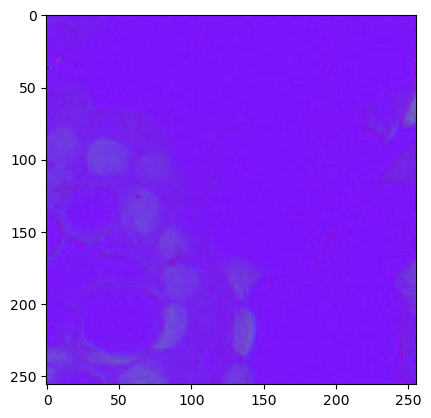

In [ ]:
open_cv_image = np.array(ori[-2])[:, :, ::-1].copy()
hsvFrame = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2HSV)
plt.imshow(hsvFrame)

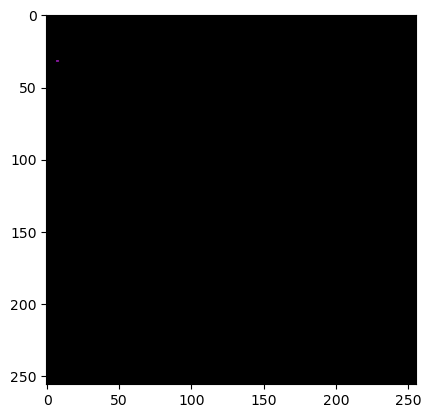

In [ ]:
lower_red = np.array([155,25,0])
upper_red = np.array([179,255,255])
mask = cv2.inRange(hsvFrame, lower_red, upper_red)

# or your HSV image, which I *believe* is what you want
output_hsv = hsvFrame.copy()
output_hsv[np.where(mask==0)] = 0

imgplot = plt.imshow(output_hsv)
plt.show()

In [ ]:
np.sum(output_hsv)

820